In [1]:
import os
import sys
print(os.path.abspath(''))

pkg_path = os.path.abspath('..')
print(pkg_path)
sys.path.insert(0, pkg_path)

import pyolin

/pyolin/notebooks
/pyolin


1. Reading data from a Cello UCF file

In [2]:
from pyolin.ucf import UCF

data = UCF("../ucf/Eco1C1G1T1.UCF.json");
print(data.names)

['A1_AmtR', 'B1_BM3R1', 'B2_BM3R1', 'B3_BM3R1', 'E1_BetI', 'F1_AmeR', 'H1_HlyIIR', 'I1_IcaRA', 'L1_LitR', 'N1_LmrA', 'P1_PhlF', 'P2_PhlF', 'P3_PhlF', 'Q1_QacR', 'Q2_QacR', 'R1_PsrA', 'S1_SrpR', 'S2_SrpR', 'S3_SrpR', 'S4_SrpR']


2. Getting gate from the data

In [3]:
AmtR = data["A1_AmtR"]

3. Plotting a gate

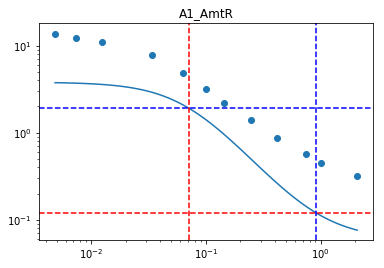

In [4]:
AmtR.quickplot.show()

4. Plotting all the gates in the UCF data

In [5]:
names = data.names
for name in names:
    #data[name].quickplot.show()
    pass

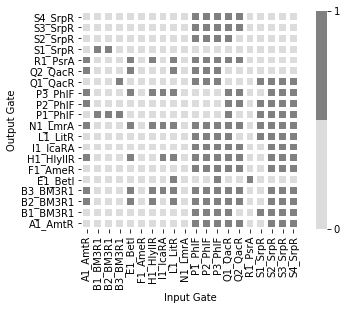

In [6]:
from pyolin.plotting import compatibility_heatmap

names = data.names
gates = [data[name] for name in names]
heatmap = compatibility_heatmap(gates)

5. Some properties of the gates

In [7]:
AmtR.ys
AmtR.dynamic_input_range
AmtR.dynamic_output_range
AmtR.name
AmtR.hill_function
AmtR.params

{'K': 0.07, 'n': 1.6, 'ymax': 3.8, 'ymin': 0.06}

6. Get a gate from a simple csv file of form:

    xs,n,n,n,n,...,n
    
    gate1,n,n,n,...,n
    
    gate2,n,n,n,...,n
    
    .
    
    .
    
    .

/pyolin/pyolin/gate.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**n * ymax * (t - 1)) / (ymax - t * ymin))**(1 / n)
/pyolin/pyolin/gate.py:66: RuntimeWarning: invalid value encountered in double_scalars
  return (k**n * (ymax - t * ymin) / (t * ymin - ymin))**(1 / n)


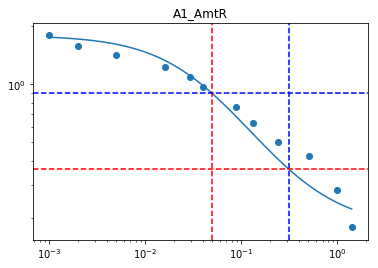

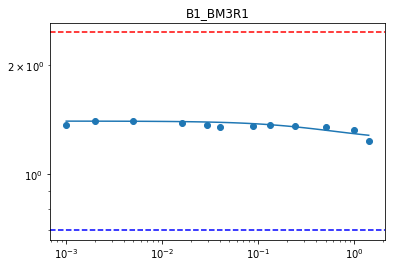

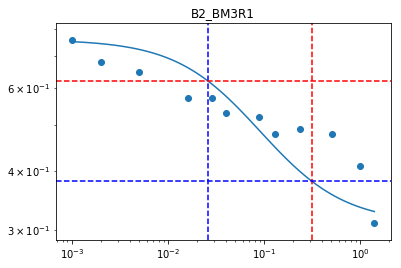

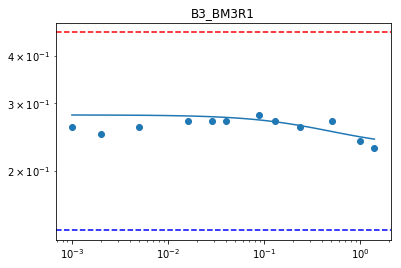

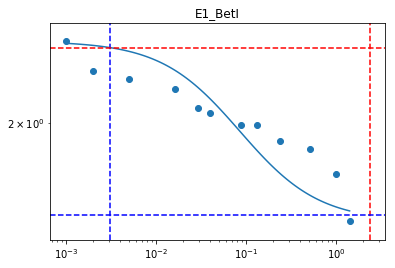

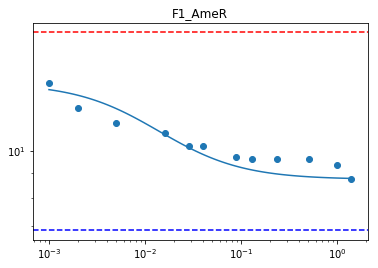

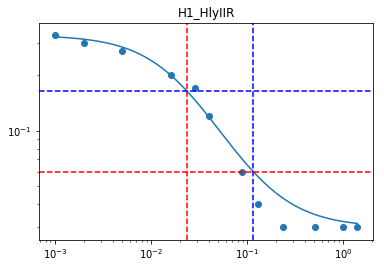

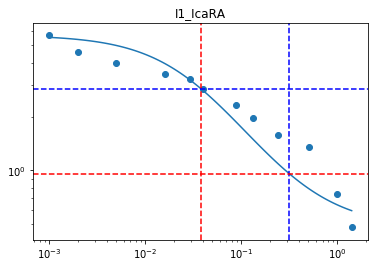

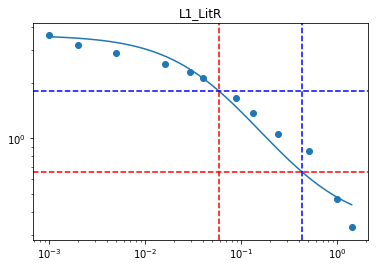

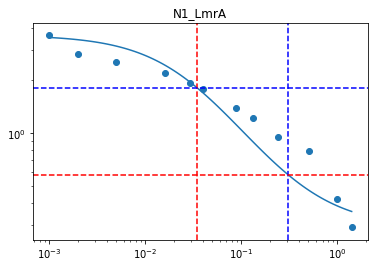

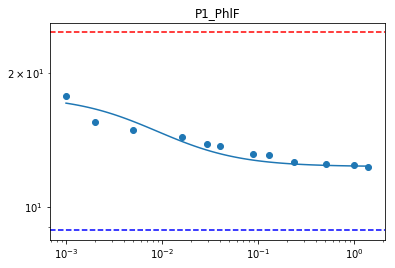

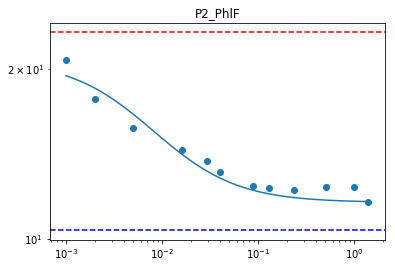

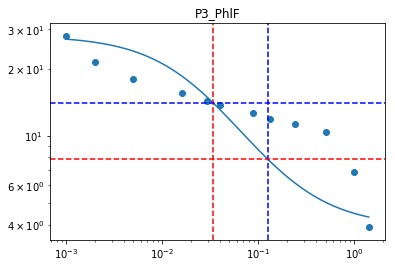

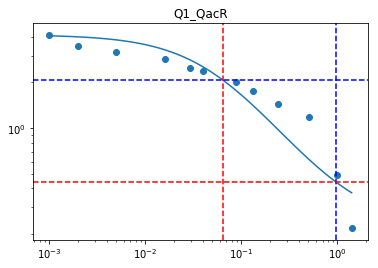

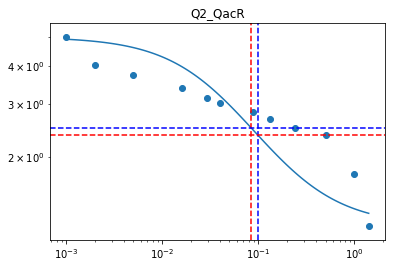

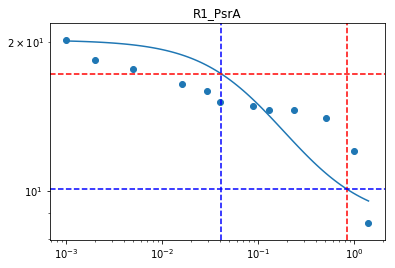

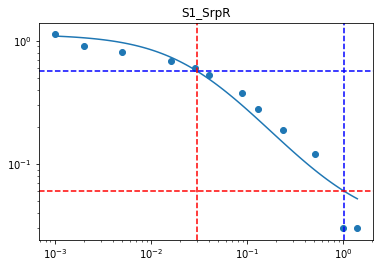

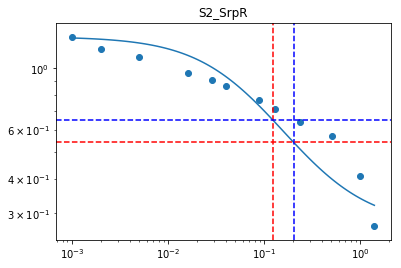

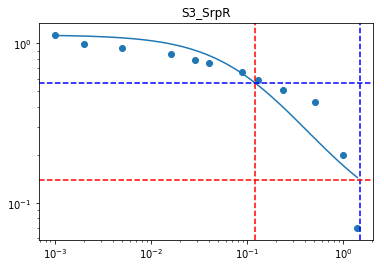

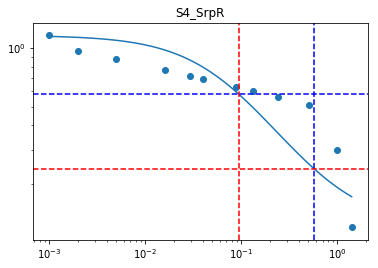

In [8]:
from pyolin.gate import Gate
for name in data.names:
    Gate.from_csv("../data/gates2.csv", name).quickplot.show()

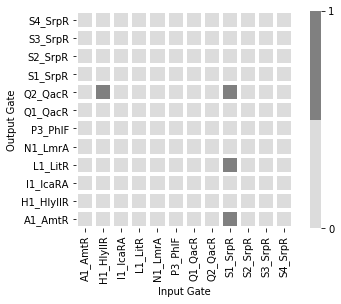

In [9]:
from pyolin.csvdata import CSVMedians
names = []
with open("../data/gates.csv") as f:
    names = CSVMedians(f).names
    
putida_gates = [Gate.from_csv("../data/gates.csv", name) for name in names]
heatmap = compatibility_heatmap(putida_gates)

In [10]:
for gate in putida_gates:
    print("Gate {} thresholds are valid: {}".format(gate.name, gate.has_valid_thresholds))

Gate F1_AmeR thresholds are valid: False
Gate A1_AmtR thresholds are valid: True
Gate E1_BetI thresholds are valid: False
Gate B1_BM3R1 thresholds are valid: False
Gate B2_BM3R1 thresholds are valid: False
Gate B3_BM3R1 thresholds are valid: False
Gate H1_HlyIIR thresholds are valid: True
Gate I1_IcaRA thresholds are valid: True
Gate L1_LitR thresholds are valid: True
Gate N1_LmrA thresholds are valid: True
Gate P1_PhlF thresholds are valid: False
Gate P2_PhlF thresholds are valid: False
Gate P3_PhlF thresholds are valid: True
Gate R1_PsrA thresholds are valid: False
Gate Q1_QacR thresholds are valid: True
Gate Q2_QacR thresholds are valid: True
Gate S1_SrpR thresholds are valid: True
Gate S2_SrpR thresholds are valid: True
Gate S3_SrpR thresholds are valid: True
Gate S4_SrpR thresholds are valid: True


In [11]:
for gate in putida_gates:
    print("Gate: {} => IL:{}, IH:{}, OL:{}, OH:{}".format(gate.name, gate.il, gate.ih, gate.ol, gate.oh))

Gate: F1_AmeR => IL:nan, IH:nan, OL:17.48, OH:6.88
Gate: A1_AmtR => IL:0.06476360099892498, IH:0.33324618139243123, OL:0.36, OH:0.895
Gate: E1_BetI => IL:2.8168313332295662, IH:0.003690994393053839, OL:2.7, OH:1.385
Gate: B1_BM3R1 => IL:nan, IH:nan, OL:2.46, OH:0.7
Gate: B2_BM3R1 => IL:0.39108369949189514, IH:0.03253497669796754, OL:0.62, OH:0.38
Gate: B3_BM3R1 => IL:nan, IH:nan, OL:0.46, OH:0.14
Gate: H1_HlyIIR => IL:0.03755994679584741, IH:0.10155433170634856, OL:0.06, OH:0.165
Gate: I1_IcaRA => IL:0.05453818845214682, IH:0.4489630315789412, OL:0.96, OH:2.855
Gate: L1_LitR => IL:0.07176461297842712, IH:0.42845999694906406, OL:0.66, OH:1.81
Gate: N1_LmrA => IL:0.050601970999341155, IH:0.44715952809097637, OL:0.58, OH:1.815
Gate: P1_PhlF => IL:nan, IH:nan, OL:24.62, OH:8.865
Gate: P2_PhlF => IL:nan, IH:nan, OL:23.2, OH:10.36
Gate: P3_PhlF => IL:0.05599411192604817, IH:0.20760149988995846, OL:7.84, OH:14.01
Gate: R1_PsrA => IL:0.8021348905036282, IH:0.03935639553174459, OL:17.24, OH:10.

Gate: S1_SrpR range:37.666666666666664
{'ymin': 0.03, 'ymax': 1.13, 'K': 0.04226370490116234, 'n': 1.1538971106960778}
Gate: A1_AmtR range:9.944444444444445
{'ymin': 0.18, 'ymax': 1.79, 'K': 0.05307438940859822, 'n': 1.1280685502566057}
Gate: L1_LitR range:10.969696969696969
{'ymin': 0.33, 'ymax': 3.62, 'K': 0.059912927030857384, 'n': 1.1151559099192978}
Gate: Q2_QacR range:4.228813559322035
{'ymin': 1.18, 'ymax': 4.99, 'K': 0.05798601093067887, 'n': 1.0000000000000002}
Gate: H1_HlyIIR range:11.000000000000002
{'ymin': 0.03, 'ymax': 0.33, 'K': 0.033986617873364953, 'n': 2.007281385372831}


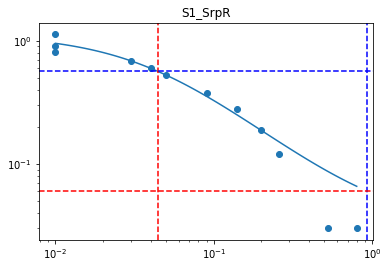

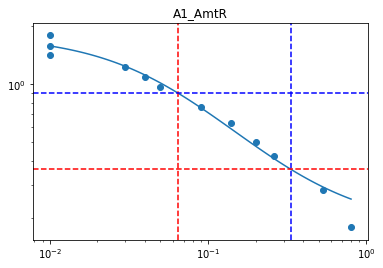

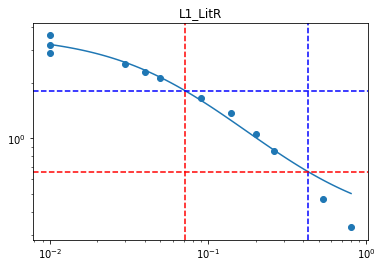

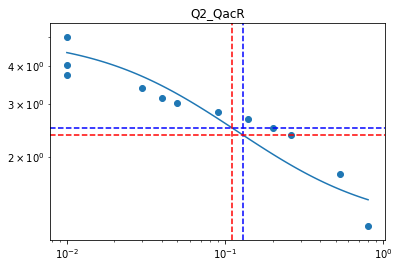

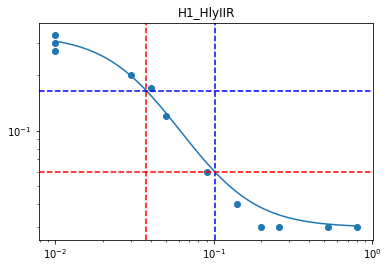

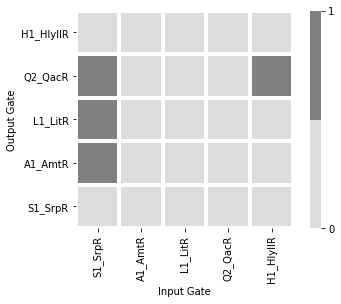

In [12]:
compat_names = ["S1_SrpR", "A1_AmtR", "L1_LitR", "Q2_QacR", "H1_HlyIIR"]
compat_gates = [Gate.from_csv("../data/gates.csv", n) for n in compat_names]
for gate in compat_gates:
    print("Gate: {} range:{}".format(gate.name, gate.dynamic_output_range))
    print(gate.params)
    gate.quickplot.show()
    
heatmap = compatibility_heatmap(compat_gates)

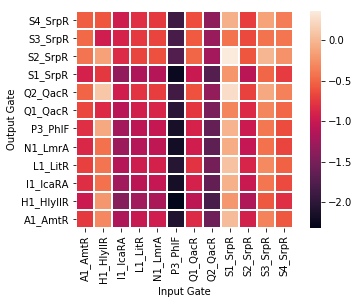

In [13]:
from pyolin.plotting import score_heatmap

putida_scores_heatmap = score_heatmap(putida_gates)

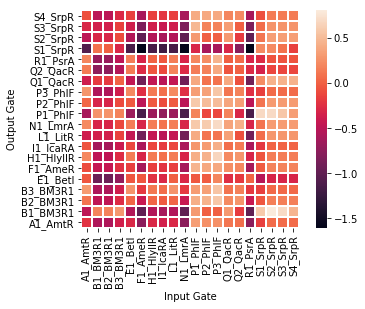

In [14]:
coli_scores_heatmap = score_heatmap(gates)